# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv
from agents.ff_sdp_agent import SDPAgentFF

import torch


## Train the agent

In [2]:
# Original
# batch_size = 256
# seed = 69
# num_nodes = 20

# Quick Test
# batch_size = 10
# seed = 23
# num_nodes = 5

batch_size = 64
seed = 23
num_nodes = 7

num_epochs = 251
# num_epochs = 251

# Instantiate the SantaIRPEnv environment
env_santa_ff = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed)

# Instantiate the TSPAgentFF (assuming it's compatible with SantaIRPEnv)
agent_santa_ff = SDPAgentFF(node_dim=num_nodes,hidden_dim=512,
    seed=seed, csv_path=f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv",
)
# Train the agent
agent_santa_ff.train(
    env_santa_ff,
    episodes=num_epochs,
    check_point_dir=f"./check_points/santa_ff_{num_nodes}_{seed}/",
)

INFO:root:Start Training
INFO:root:Episode 50 finished - Loss: -0.6173890829086304


!!

INFO:root:Episode 100 finished - Loss: -0.6296184062957764
INFO:root:Episode 150 finished - Loss: -0.6261319518089294


!

INFO:root:Episode 200 finished - Loss: -0.6216171979904175


!

INFO:root:Episode 250 finished - Loss: -0.6129494309425354


## Visualise the actions of the agent in the environments

In [3]:
#env = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)
env = env_santa_ff
TSPModel=f'./check_points/tsp_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt'

In [4]:
# Setup for evaluation
env.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_ff_{num_nodes}_{seed}.mp4"
)

In [5]:
# agent = SDPAgentFF(seed=seed)
agent_santa_ff.model.load_state_dict(torch.load(f"./check_points/santa_ff_{num_nodes}_{seed}/model_epoch_{num_epochs-1}.pt"))

<All keys matched successfully>

<Figure size 640x480 with 0 Axes>

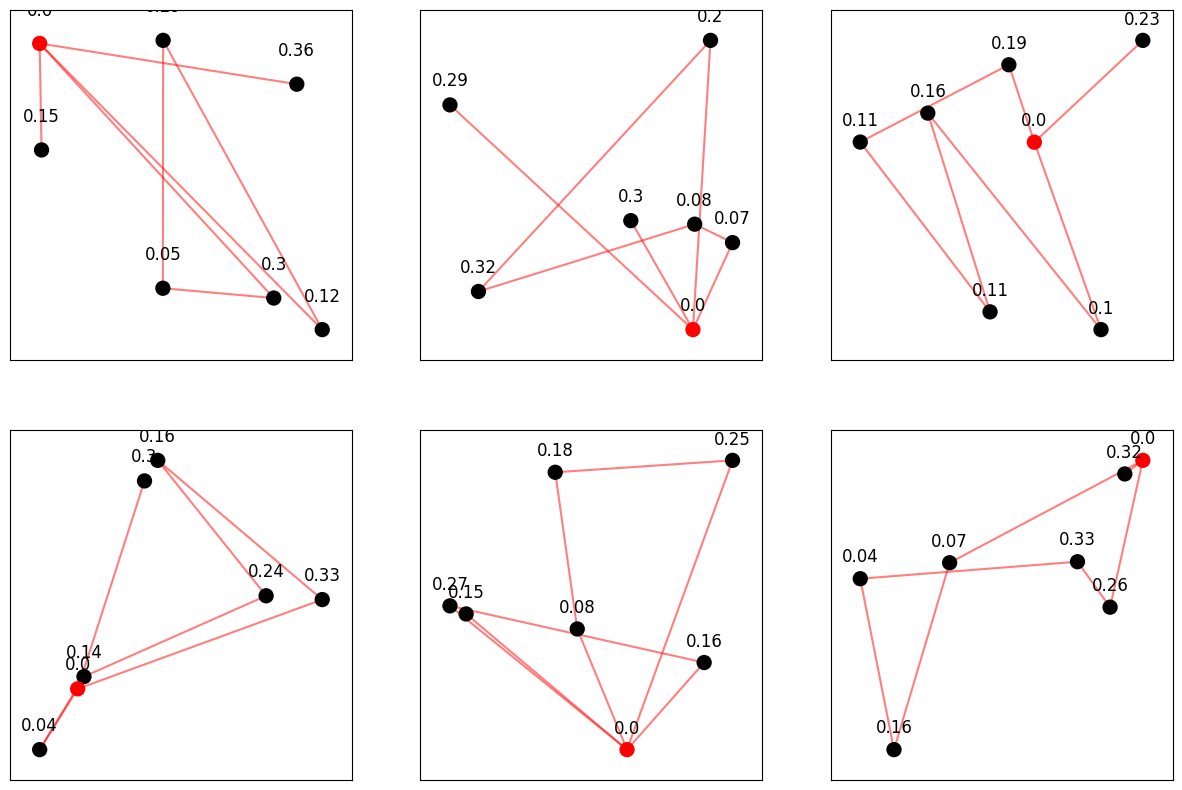

In [6]:
# Evaluate the agent
loss_a = agent_santa_ff.evaluate(env)

In [7]:
# Close the video recorder
env.vid.close()

Moviepy - Building video ./videos/video_test_santa_ff_7_23.mp4.
Moviepy - Writing video ./videos/video_test_santa_ff_7_23.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_ff_7_23.mp4


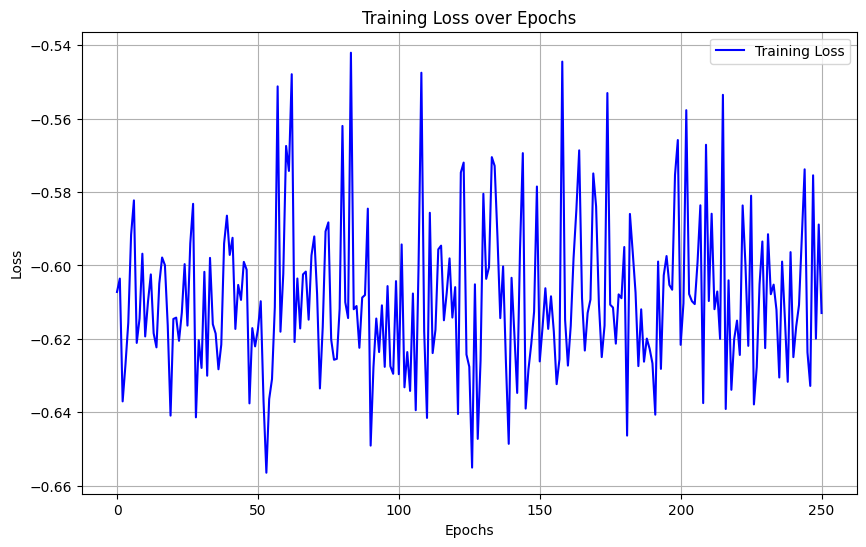

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = f"./train_logs/loss_log_santa_ff_{num_nodes}_{seed}.csv"
data = pd.read_csv(csv_path)

# Extract the 'Epoch' and 'Loss' columns
epochs = data['Epoch']
loss = data['Loss']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
